Populating the interactive namespace from numpy and matplotlib
Files found: in /home/igor/ML/data_2/set_train_segmented/  2
shape of image begin:  (176, 208, 176)
g_train_6.nii.npy


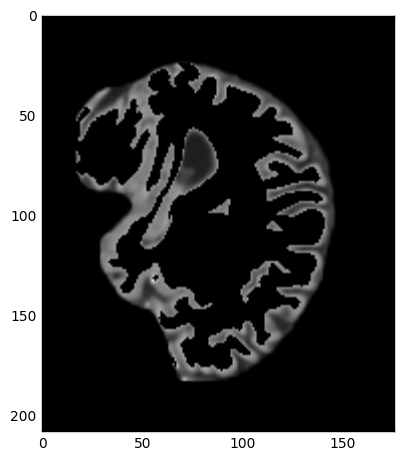

mean:  564.908412724
shape of image begin:  (176, 208, 176)
w_train_6.nii.npy


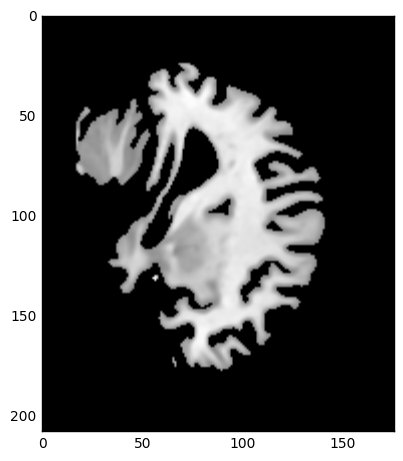

mean:  1207.15038894


In [31]:
# visualize segmented brains...
import os
import numpy as np
import gc
import nibabel as nib
import matplotlib.pyplot as plt
from os.path import isfile, join
%pylab inline

mode = 'train'
  
def nda_show(nda, title=None, margin=0.05, dpi=40 ):
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()    


test_path = '/home/igor/ML/data_2/set_'+mode+'_segmented/'

idxSlice = 55

onlyfiles = [f for f in os.listdir(test_path) if isfile(join(test_path, f)) and f.endswith('_6.nii.npy')]
onlyfiles.sort()


print 'Files found: in '+test_path+' ', len(onlyfiles)

for f in onlyfiles:
    full_f = join(test_path, f)
    ndImg = np.load(full_f)      
    print 'shape of image begin: ', ndImg.shape
    print f
    nda_show(ndImg[idxSlice,:,:])
    
    # here plot the histogram for this image
    new_size = ndImg.shape[0] * ndImg.shape[1] * ndImg.shape[2]
    imgLst = np.reshape(ndImg, (1, new_size))
    imgLst = imgLst[imgLst <> 0]
    print 'mean: ', np.mean(imgLst)
    #plt.hist(imgLst, bins = 300)
    #plt.xlabel("Voxel Intensity")
    #plt.ylabel("Frequency")
    #plt.show()
    gc.collect()

Files found: in /home/igor/ML/data_2/set_train/  278
count_h:  211
count_i:  68
0 / 278
1 / 278
2 / 278
3 / 278
4 / 278
5 / 278
6 / 278
7 / 278
8 / 278
9 / 278
10 / 278
11 / 278
12 / 278
13 / 278
14 / 278
15 / 278
16 / 278
17 / 278
18 / 278
19 / 278
20 / 278
21 / 278
22 / 278
23 / 278
24 / 278
25 / 278
26 / 278
27 / 278
28 / 278
29 / 278
30 / 278
31 / 278
32 / 278
33 / 278
34 / 278
35 / 278
36 / 278
37 / 278
38 / 278
39 / 278
40 / 278
41 / 278
42 / 278
43 / 278
44 / 278
45 / 278
46 / 278
47 / 278
48 / 278
49 / 278
50 / 278
51 / 278
52 / 278
53 / 278
54 / 278
55 / 278
56 / 278
57 / 278
58 / 278
59 / 278
60 / 278
61 / 278
62 / 278
63 / 278
64 / 278
65 / 278
66 / 278
67 / 278
68 / 278
69 / 278
70 / 278
71 / 278
72 / 278
73 / 278
74 / 278
75 / 278
76 / 278
77 / 278
78 / 278
79 / 278
80 / 278
81 / 278
82 / 278
83 / 278
84 / 278
85 / 278
86 / 278
87 / 278
88 / 278
89 / 278
90 / 278
91 / 278
92 / 278
93 / 278
94 / 278
95 / 278
96 / 278
97 / 278
98 / 278
99 / 278
100 / 278
101 / 278
102 / 278


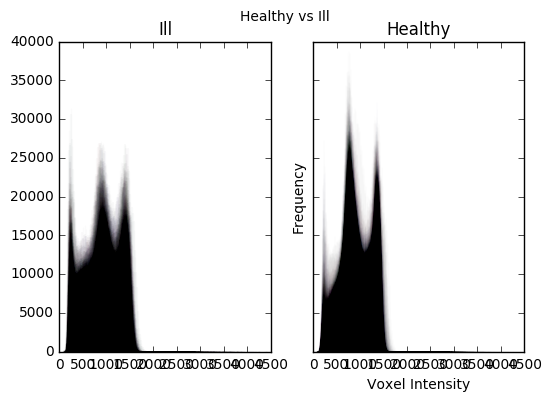

In [32]:
# visualize image histograms
from __future__ import division
mode = 'train'

test_path = '/home/igor/ML/data_2/set_'+mode+'/'

targets_file = join('/home/igor/ML/data_2/', 'targets.csv')

targets = [0]
with open(targets_file, 'rb') as csvfile:
    for line in csvfile:
        targets.append(int(line))

onlyfiles = [f for f in os.listdir(test_path) if isfile(join(test_path, f)) and f.endswith('.nii')]
onlyfiles.sort()
#onlyfiles = onlyfiles[:20]
length = len(onlyfiles)

print 'Files found: in '+test_path+' ', len(onlyfiles)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
fig.suptitle('Healthy vs Ill')
axs[0].set_title('Ill')
axs[1].set_title('Healthy')

count_h = targets.count(1)
count_i = targets.count(0)
alpha_h = 1 / count_h
alpha_i = 1 / count_i
print 'count_h: ', count_h
print 'count_i: ', count_i

for i,f in enumerate(onlyfiles):
    print i,'/',length
    full_f = join(test_path, f)
    ndImg = nib.load(full_f).get_data()
    pic_id = int(f.split('.')[0].split('_')[-1])
    ndImg = np.sum(ndImg, axis=3)       # sum upon the 4th axis so that we reduce the img to 3d
    
    # here plot the histogram for this image
    new_size = ndImg.shape[0] * ndImg.shape[1] * ndImg.shape[2]
    imgLst = np.reshape(ndImg, (1, new_size))
    imgLst = imgLst[imgLst <> 0]
    
    if targets[pic_id] == 0:
        axs[0].hist(imgLst, bins = 300, alpha=alpha_i)
    if targets[pic_id] == 1:
        axs[1].hist(imgLst, bins = 300, alpha=alpha_h)  
    gc.collect()
    
plt.xlabel("Voxel Intensity")
plt.ylabel("Frequency")
fig_size = plt.rcParams["figure.figsize"]
# Set figure width and height
fig_size[0] = 24
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size  
plt.show()    

#print 'Healthy std:  ', int(np.sqrt(np.sum(h_std)))
#print 'Ill std:      ', int(np.sqrt(np.sum(i_std)))

Files found: in /home/igor/ML/data_2/set_train_segmented/  50
count_h:  211
count_i:  68
0 / 50
1 / 50
2 / 50
3 / 50
4 / 50
5 / 50
6 / 50
7 / 50
8 / 50
9 / 50
10 / 50
11 / 50
12 / 50
13 / 50
14 / 50
15 / 50
16 / 50
17 / 50
18 / 50
19 / 50
20 / 50
21 / 50
22 / 50
23 / 50
24 / 50
25 / 50
26 / 50
27 / 50
28 / 50
29 / 50
30 / 50
31 / 50
32 / 50
33 / 50
34 / 50
35 / 50
36 / 50
37 / 50
38 / 50
39 / 50
40 / 50
41 / 50
42 / 50
43 / 50
44 / 50
45 / 50
46 / 50
47 / 50
48 / 50
49 / 50


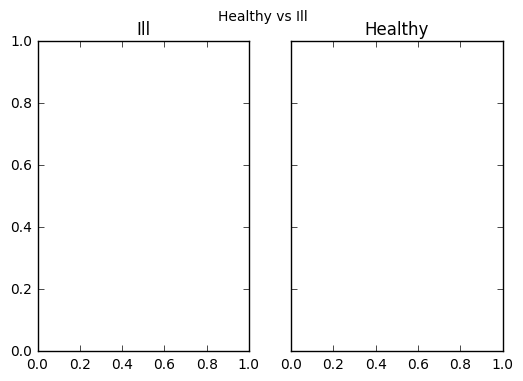

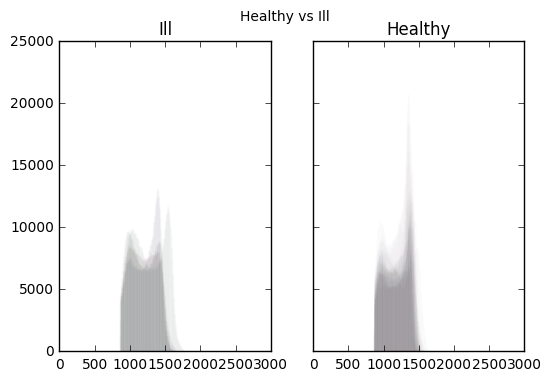

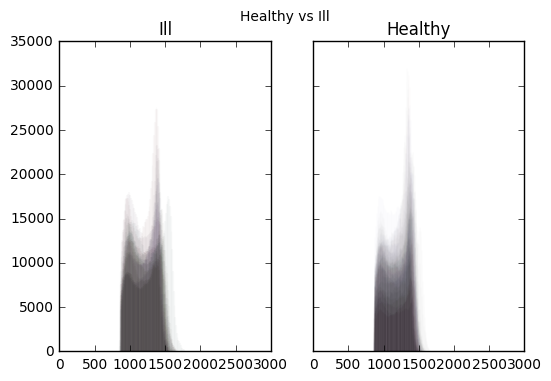

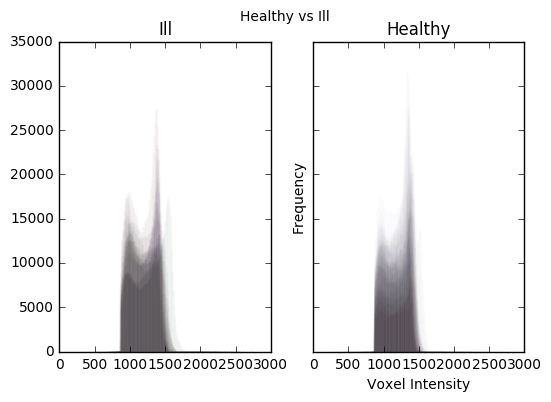

In [5]:
# visualize white matter histograms
from __future__ import division
import os
import numpy as np
import gc
import nibabel as nib
import matplotlib.pyplot as plt
from os.path import isfile, join
mode = 'train'

test_path = '/home/igor/ML/data_2/set_'+mode+'_segmented/'

targets_file = join('/home/igor/ML/data_2/', 'targets.csv')

targets = [0]
with open(targets_file, 'rb') as csvfile:
    for line in csvfile:
        targets.append(int(line))

onlyfiles = [f for f in os.listdir(test_path) if isfile(join(test_path, f)) \
             and f.endswith('.nii.npy') and f.startswith('w_')]
onlyfiles.sort()
onlyfiles = onlyfiles[:50]
length = len(onlyfiles)

print 'Files found: in '+test_path+' ', length

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
fig.suptitle('Healthy vs Ill')
axs[0].set_title('Ill')
axs[1].set_title('Healthy')

count_h = targets.count(1)
count_i = targets.count(0)
alpha_h = 1 / count_h
alpha_i = 1 / count_i
print 'count_h: ', count_h
print 'count_i: ', count_i

for i,f in enumerate(onlyfiles):
    print i,'/',length
    full_f = join(test_path, f)
    ndImg = np.load(full_f)
    pic_id = int(f.split('_')[2].split('.')[0])
    
    # here plot the histogram for this image
    new_size = ndImg.shape[0] * ndImg.shape[1] * ndImg.shape[2]
    imgLst = np.reshape(ndImg, (1, new_size))
    imgLst = imgLst[imgLst <> 0]
    
    if targets[pic_id] == 0:
        axs[0].hist(imgLst, bins = 200, alpha=alpha_i)
    if targets[pic_id] == 1:
        axs[1].hist(imgLst, bins = 200, alpha=alpha_h)  
    gc.collect()
    
plt.xlabel("Voxel Intensity")
plt.ylabel("Frequency")
fig_size = plt.rcParams["figure.figsize"]
# Set figure width and height
fig_size[0] = 24
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size  
plt.show()    

#print 'Healthy std:  ', int(np.sqrt(np.sum(h_std)))
#print 'Ill std:      ', int(np.sqrt(np.sum(i_std)))

Files found: in /home/igor/ML/data_2/set_train_segmented/  60
count_h:  211
count_i:  68
0 / 60
30 / 60


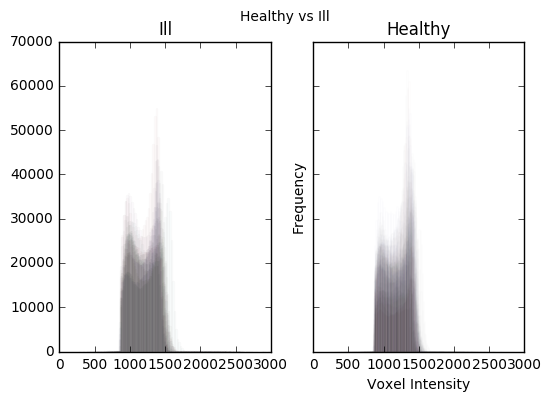

In [2]:
# visualize gray matter histograms
from __future__ import division
import os
import numpy as np
import gc
import nibabel as nib
import matplotlib.pyplot as plt
from os.path import isfile, join
mode = 'train'

test_path = '/home/igor/ML/data_2/set_'+mode+'_segmented/'

targets_file = join('/home/igor/ML/data_2/', 'targets.csv')

targets = [0]
with open(targets_file, 'rb') as csvfile:
    for line in csvfile:
        targets.append(int(line))

onlyfiles = [f for f in os.listdir(test_path) if isfile(join(test_path, f)) \
             and f.endswith('.nii.npy') and f.startswith('w_')]
onlyfiles.sort()
onlyfiles = onlyfiles[:60]
length = len(onlyfiles)

print 'Files found: in '+test_path+' ', length

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
fig.suptitle('Healthy vs Ill')
axs[0].set_title('Ill')
axs[1].set_title('Healthy')

count_h = targets.count(1)
count_i = targets.count(0)
alpha_h = 1 / count_h
alpha_i = 1 / count_i
print 'count_h: ', count_h
print 'count_i: ', count_i

for i,f in enumerate(onlyfiles):
    if i % 30 == 0:
        print i,'/',length
    full_f = join(test_path, f)
    ndImg = np.load(full_f)
    pic_id = int(f.split('_')[2].split('.')[0])
    
    # here plot the histogram for this image
    new_size = ndImg.shape[0] * ndImg.shape[1] * ndImg.shape[2]
    imgLst = np.reshape(ndImg, (1, new_size))
    imgLst = imgLst[imgLst <> 0]
    
    if targets[pic_id] == 0:
        axs[0].hist(imgLst, bins = 100, alpha=alpha_i)
    if targets[pic_id] == 1:
        axs[1].hist(imgLst, bins = 100, alpha=alpha_h)  
    gc.collect()
    
plt.xlabel("Voxel Intensity")
plt.ylabel("Frequency")
fig_size = plt.rcParams["figure.figsize"]
# Set figure width and height
fig_size[0] = 24
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size  
plt.show()    

#print 'Healthy std:  ', int(np.sqrt(np.sum(h_std)))
#print 'Ill std:      ', int(np.sqrt(np.sum(i_std)))

Files found: in /home/igor/ML/data_3/set_train_segmented/  100
count_h:  211
count_i:  68
0 / 100
30 / 100
60 / 100
90 / 100
Plotting...


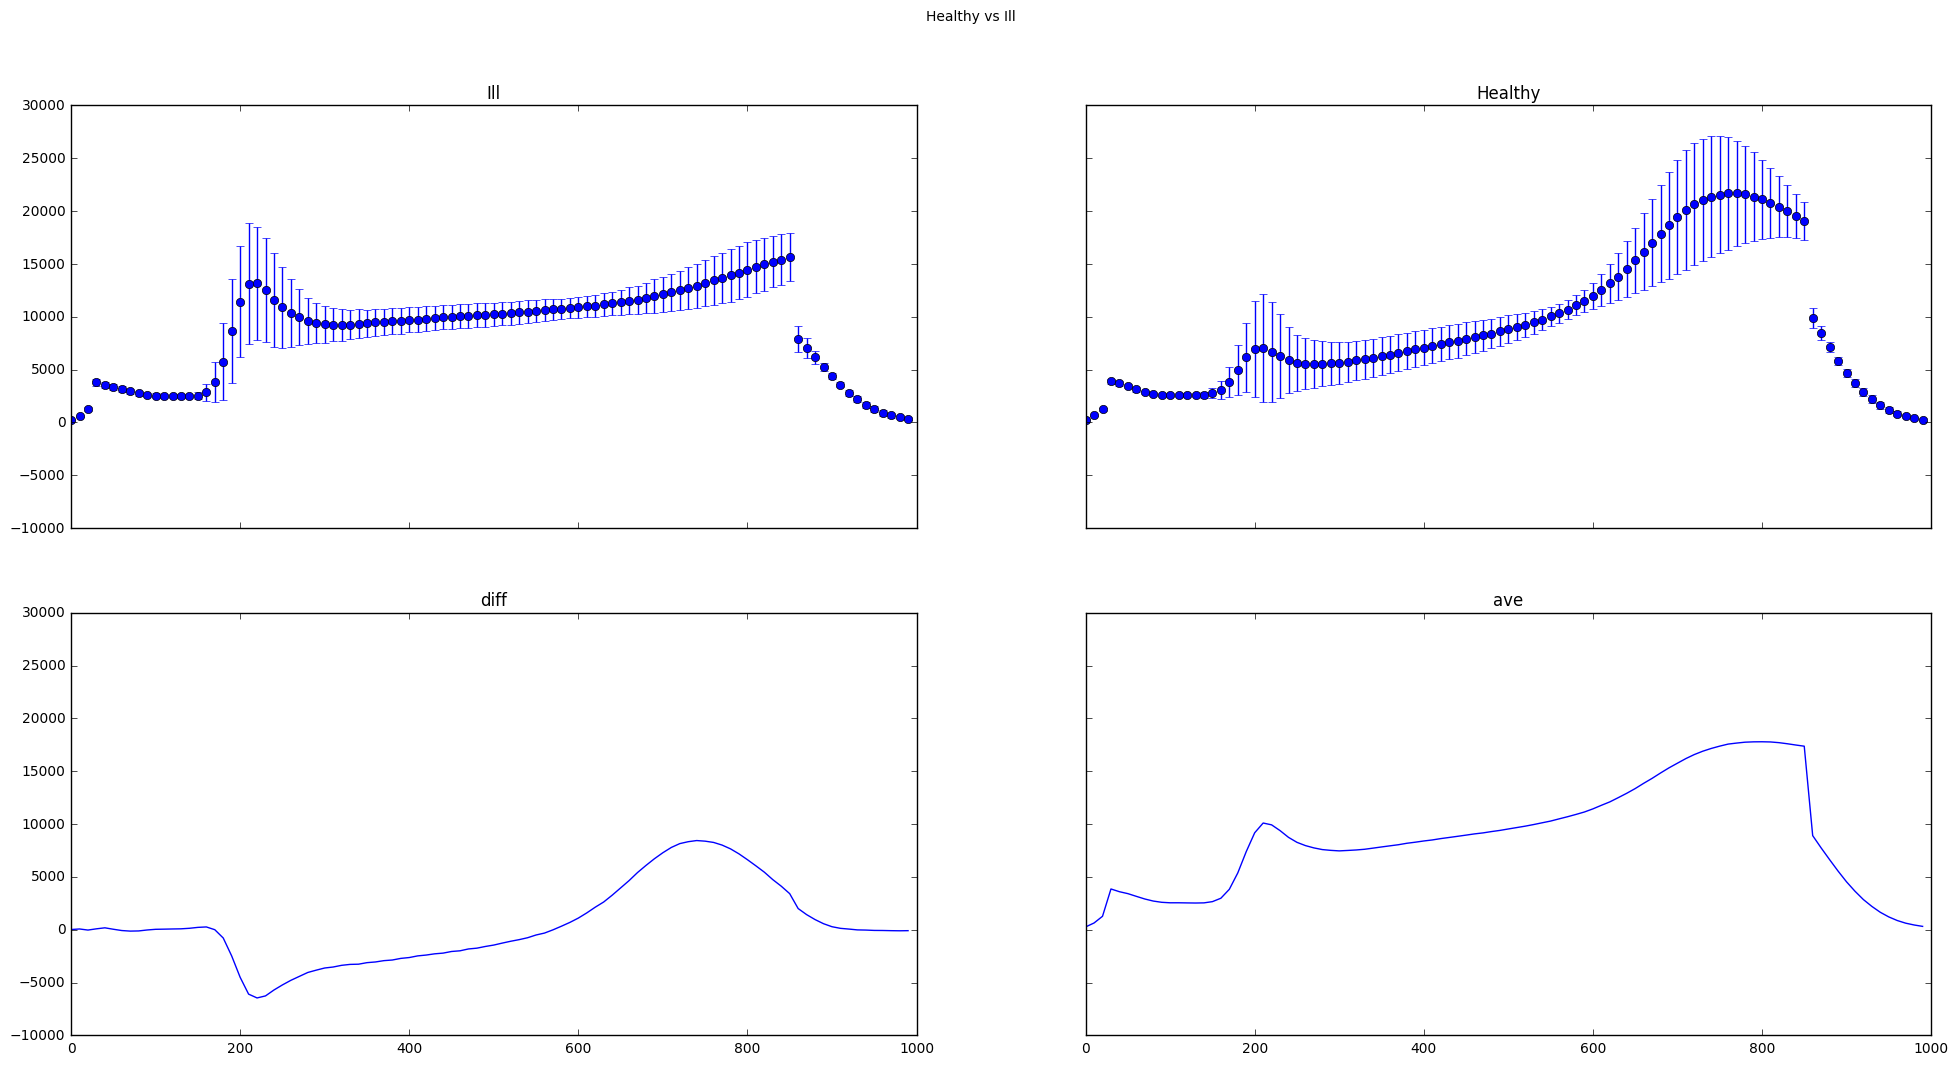

In [6]:
# visualize gray matter histograms
from __future__ import division
import os
import numpy as np
import gc
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from os.path import isfile, join
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
mode = 'train'

test_path = '/home/igor/ML/data_3/set_'+mode+'_segmented/'

targets_file = join('/home/igor/ML/data_2/', 'targets.csv')

targets = [0]
with open(targets_file, 'rb') as csvfile:
    for line in csvfile:
        targets.append(int(line))

onlyfiles = [f for f in os.listdir(test_path) if isfile(join(test_path, f)) \
             and f.endswith('.nii.npy') and f.startswith('g_')]
onlyfiles.sort()
onlyfiles = onlyfiles[:100]
length = len(onlyfiles)

print 'Files found: in '+test_path+' ', length

plt.close()

fig_size = plt.rcParams["figure.figsize"]
# Set figure width and height
fig_size[0] = 24
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size  


count_h = targets.count(1)
count_i = targets.count(0)
alpha_h = 1 / count_h
alpha_i = 1 / count_i
print 'count_h: ', count_h
print 'count_i: ', count_i

bins = 100
X = []
y = []
bin_edges = []
for i,f in enumerate(onlyfiles):
    if i % 30 == 0:
        print i,'/',length
    full_f = join(test_path, f)
    ndImg = np.load(full_f)
    pic_id = int(f.split('_')[2].split('.')[0])
    
    # here plot the histogram for this image
    new_size = ndImg.shape[0] * ndImg.shape[1] * ndImg.shape[2]
    imgLst = np.reshape(ndImg, (1, new_size))
    imgLst = imgLst[imgLst <> 0]
    
    x, bin_edges = np.histogram(imgLst, bins=bins, range=(0, 1000))
  
    X.append(x)
    #if X == []:
    #    X = x
    #else:
    #    X = np.vstack((X,x))
    y.append(targets[pic_id])
    #print bin_edges
    #print x
    gc.collect()


variance_threshold01 = VarianceThreshold(threshold=.5)
X = variance_threshold01.fit_transform(X)
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
bin_edges = bin_edges[:X.shape[1]+1]

i_means = []
i_stds = []
h_means = []
h_stds = []
for it, x in enumerate(X):
    if y[it] == 0:
        i_means.append(x) 
    if y[it] == 1:
        h_means.append(x)
        
i_stds = np.std(i_means, axis=0)
h_stds = np.std(h_means, axis=0)    
i_means = np.mean(i_means, axis=0)
h_means = np.mean(h_means, axis=0)

x_ax = bin_edges[:-1]
print 'Plotting...'
plt.close()
#c_h = 1
#c_i = 1
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
fig.suptitle('Healthy vs Ill')
axs[0,0].set_title('Ill')
axs[0,1].set_title('Healthy')
axs[0,0].errorbar(x_ax, i_means, yerr=i_stds, fmt='o')
axs[0,1].errorbar(x_ax, h_means, yerr=h_stds, fmt='o')

axs[1,0].set_title('diff')
axs[1,0].plot(x_ax, np.subtract(h_means, i_means))
axs[1,1].set_title('ave')
axs[1,1].plot(x_ax, [x/2 for x in np.sum([h_means, i_means], axis=0)])
plt.show()
plt.show()    


In [52]:
from __future__ import division
import numpy as np
from operator import itemgetter

vSize = 8.0
max_bin = 1500.0
width = max_bin/vSize
bin_edges = np.arange(0, max_bin+width, width)
print bin_edges
test = range(0, 10000, 1)
y , bin_edges = np.histogram(test, bins=bin_edges)
x_ax = bin_edges[:-1]
plt.plot(x_ax, y, fmt='o')
plt.show()

[    0.    187.5   375.    562.5   750.    937.5  1125.   1312.5  1500. ]


AttributeError: Unknown property fmt

Files found: in /home/igor/ML/data_2/set_train_segmented/  50
count_h:  211
count_i:  68
g_train_1.nii.npy


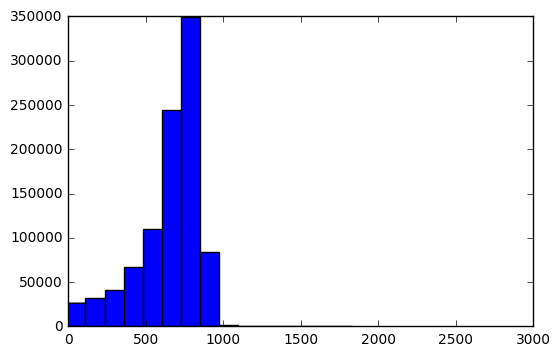

g_train_10.nii.npy


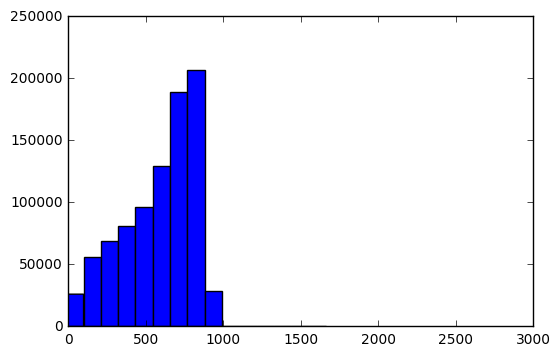

g_train_100.nii.npy


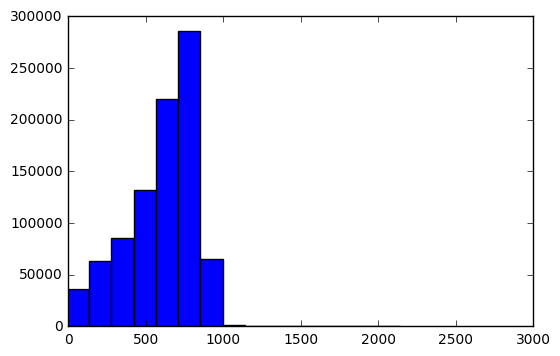

g_train_101.nii.npy


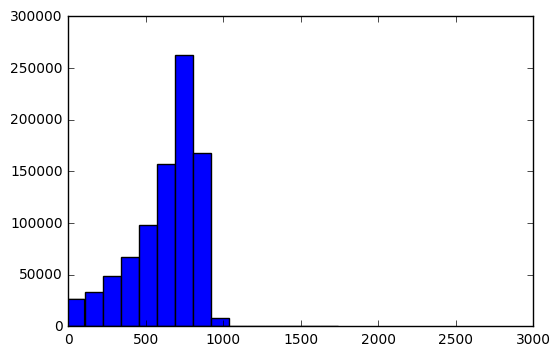

g_train_102.nii.npy


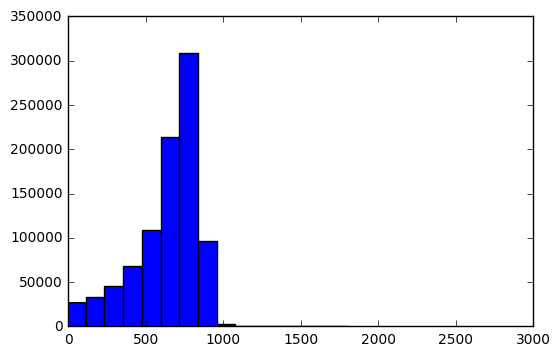

g_train_103.nii.npy


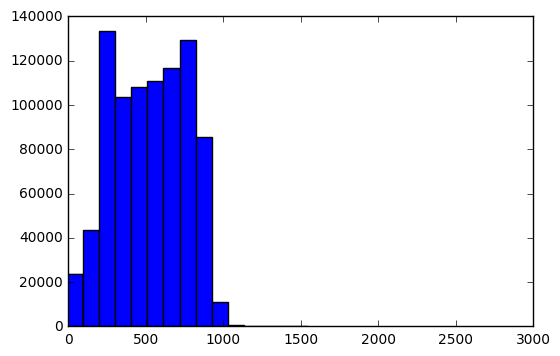

g_train_104.nii.npy


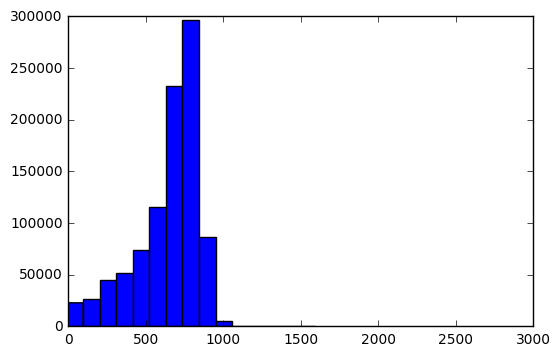

g_train_105.nii.npy


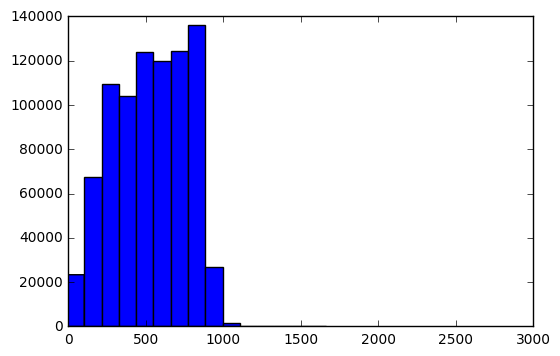

g_train_106.nii.npy


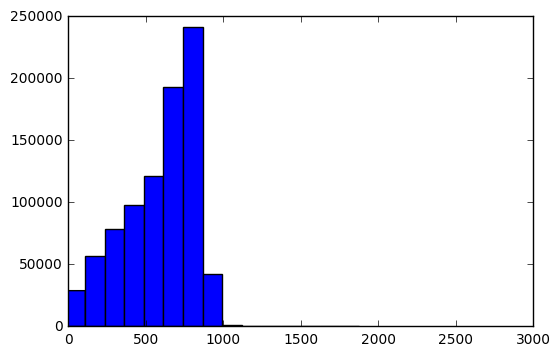

g_train_107.nii.npy


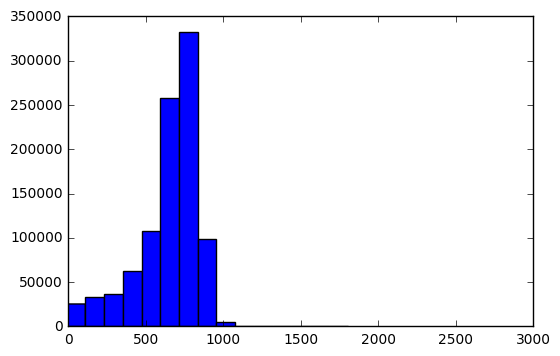

g_train_108.nii.npy


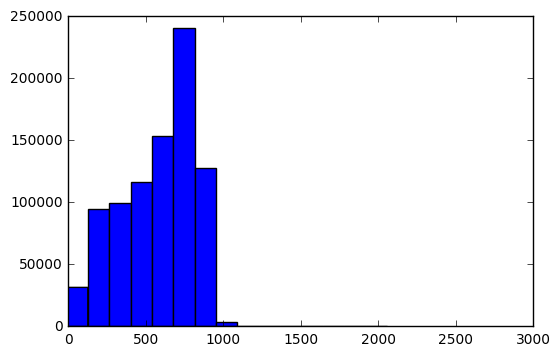

g_train_109.nii.npy


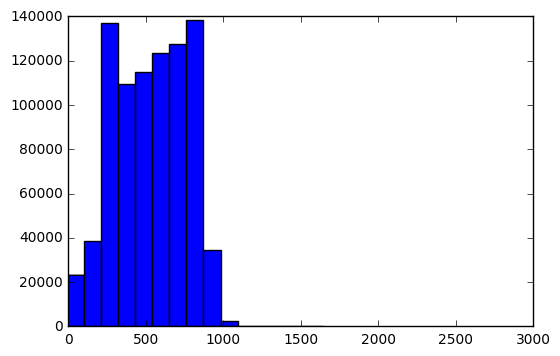

g_train_11.nii.npy


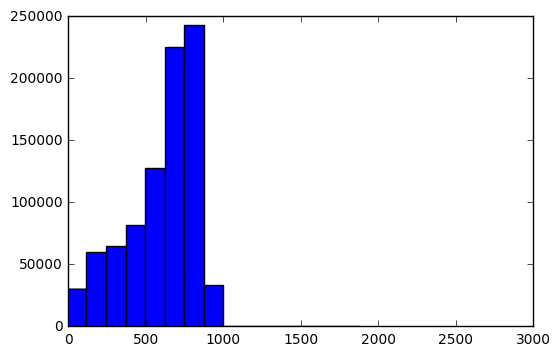

g_train_110.nii.npy


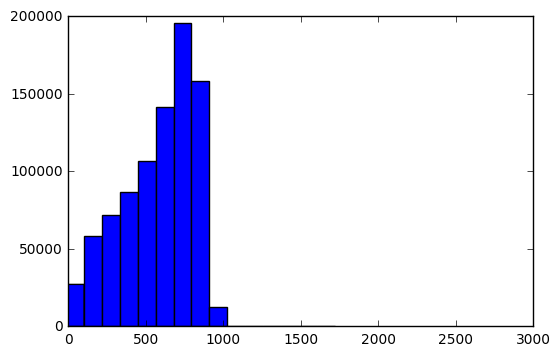

g_train_111.nii.npy


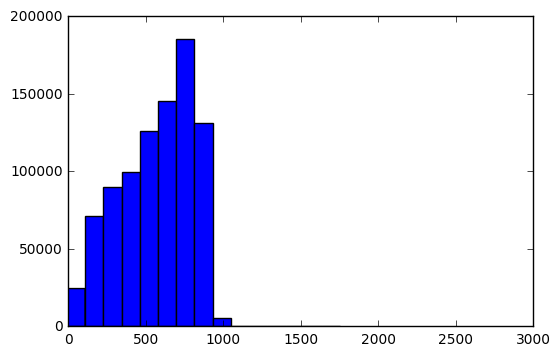

g_train_112.nii.npy


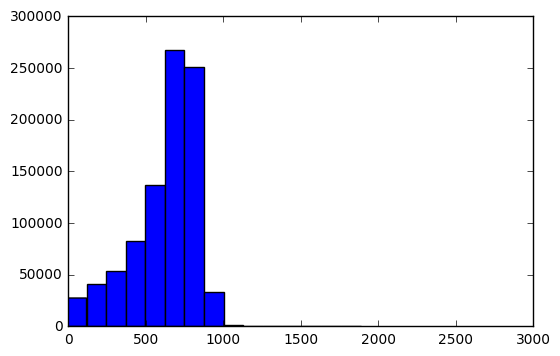

g_train_113.nii.npy


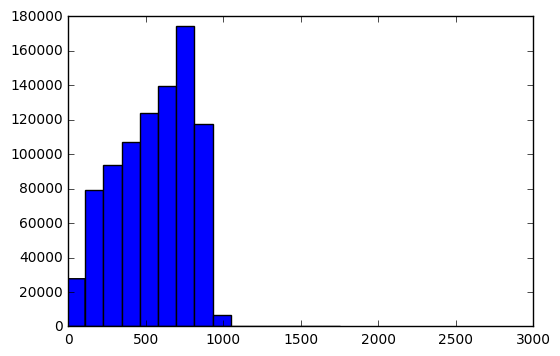

g_train_114.nii.npy


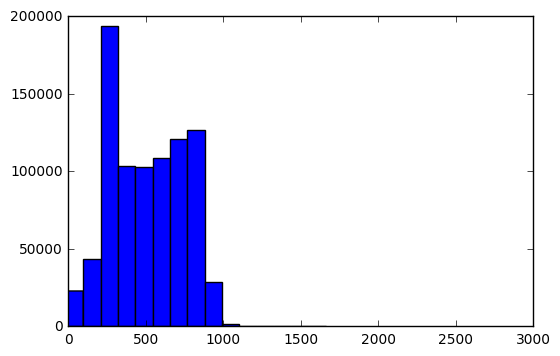

g_train_115.nii.npy


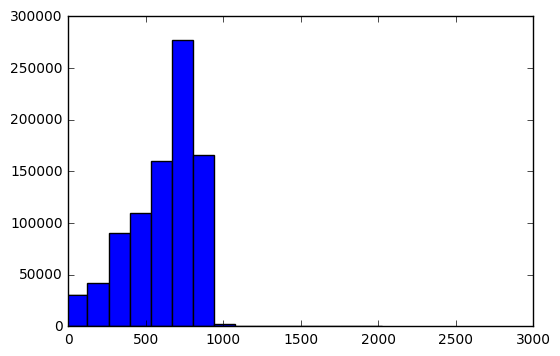

g_train_116.nii.npy


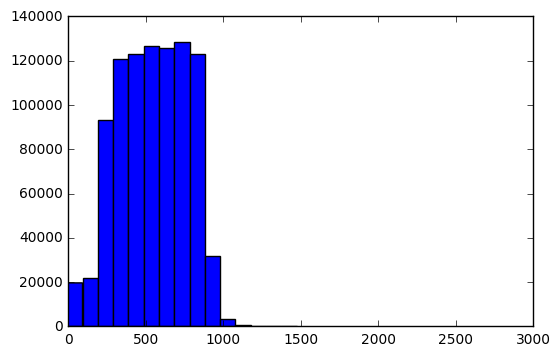

g_train_117.nii.npy


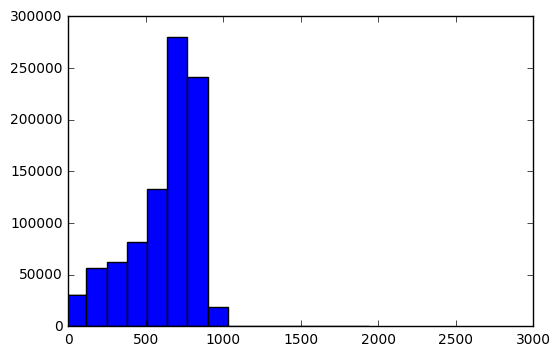

g_train_118.nii.npy


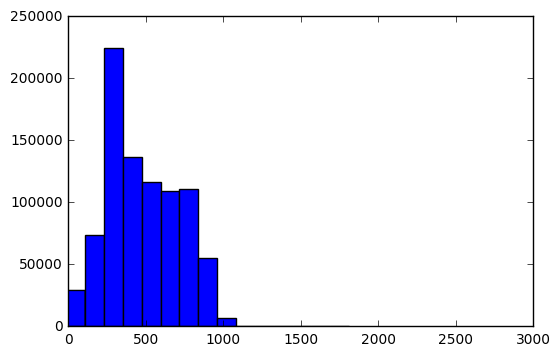

g_train_119.nii.npy


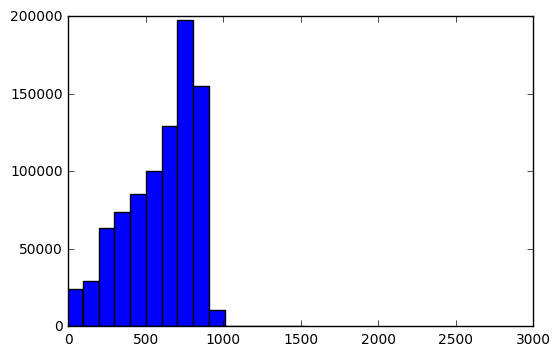

g_train_12.nii.npy


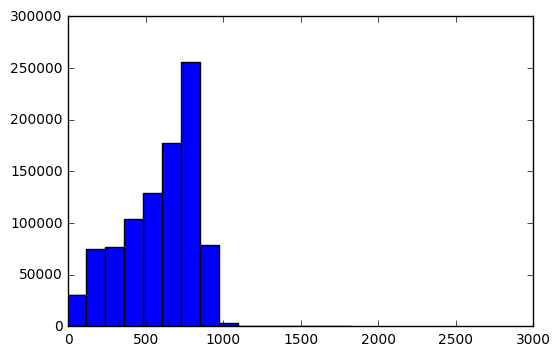

g_train_120.nii.npy


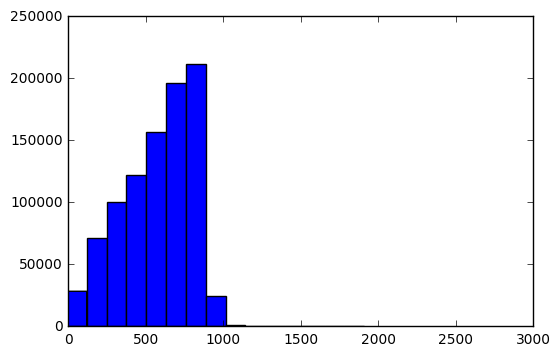

g_train_121.nii.npy


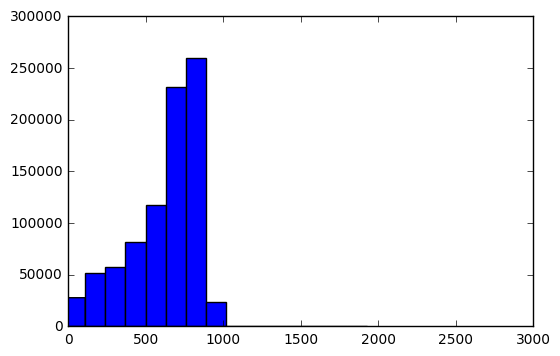

g_train_122.nii.npy


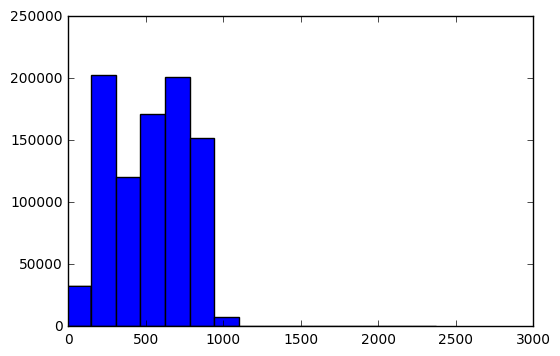

g_train_123.nii.npy


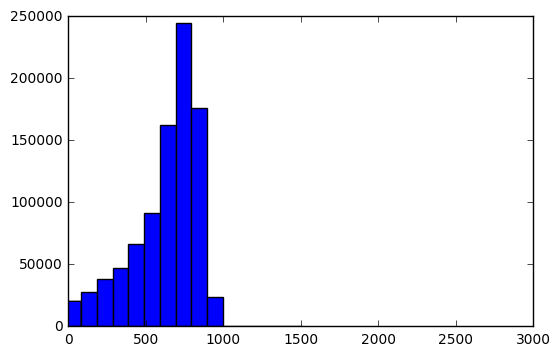

g_train_124.nii.npy


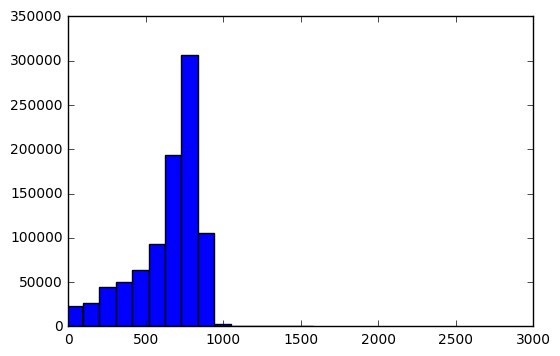

g_train_125.nii.npy


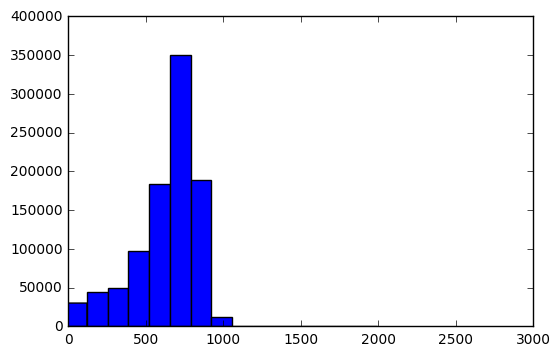

g_train_126.nii.npy


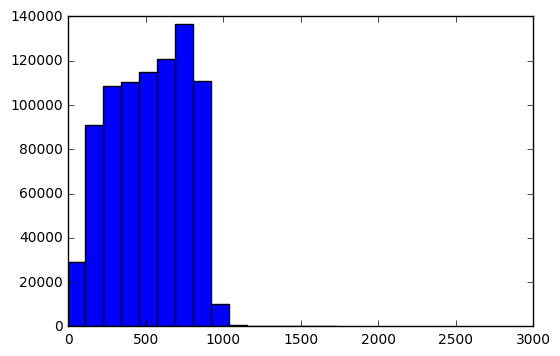

g_train_127.nii.npy


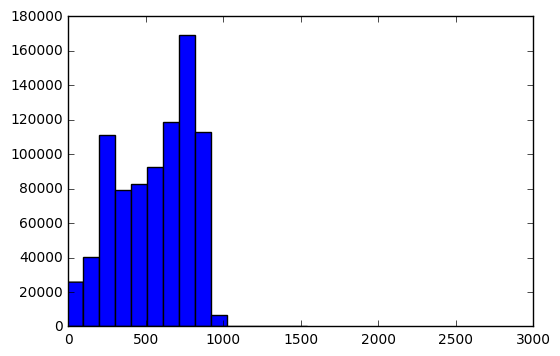

g_train_128.nii.npy


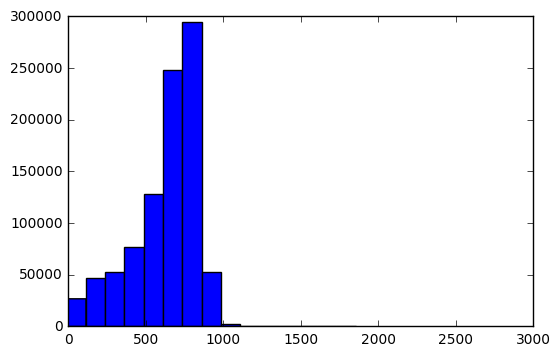

g_train_129.nii.npy


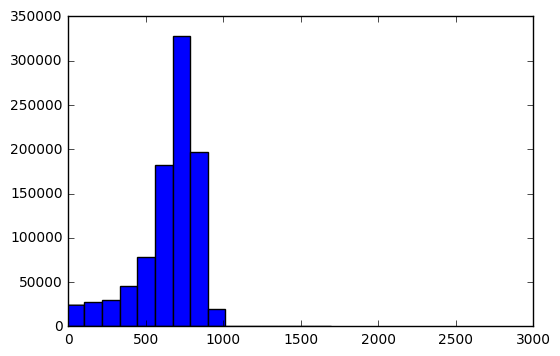

g_train_13.nii.npy


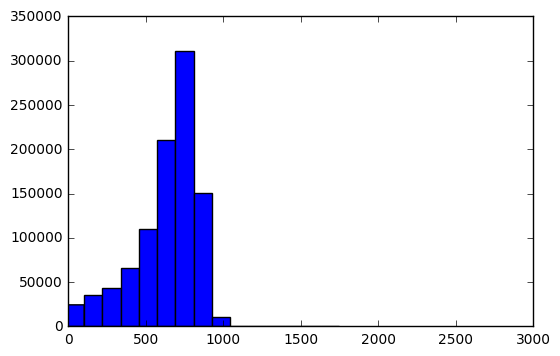

g_train_130.nii.npy


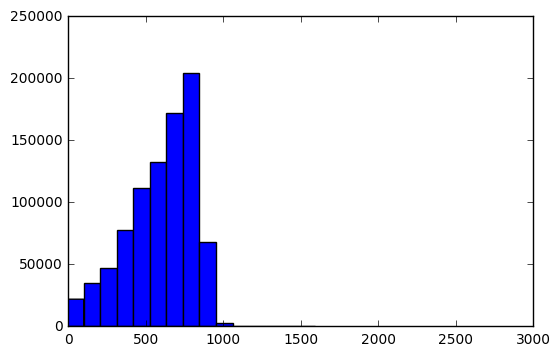

g_train_131.nii.npy


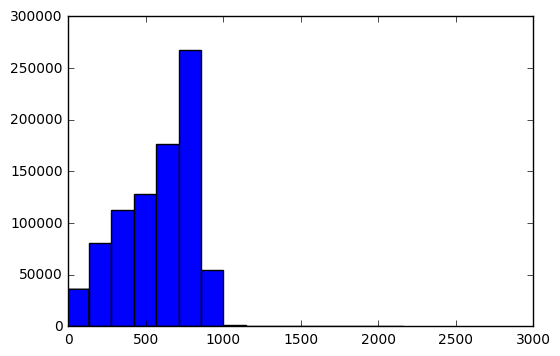

g_train_132.nii.npy


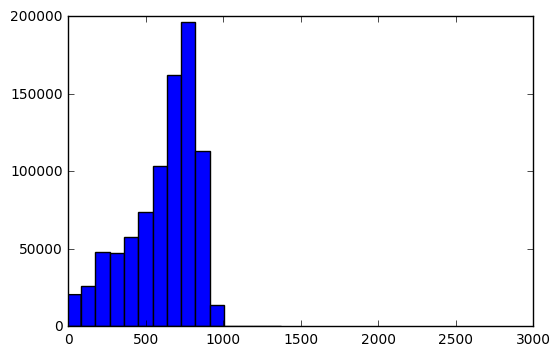

g_train_133.nii.npy


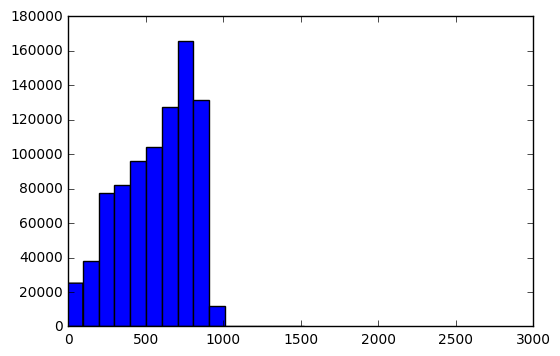

g_train_134.nii.npy


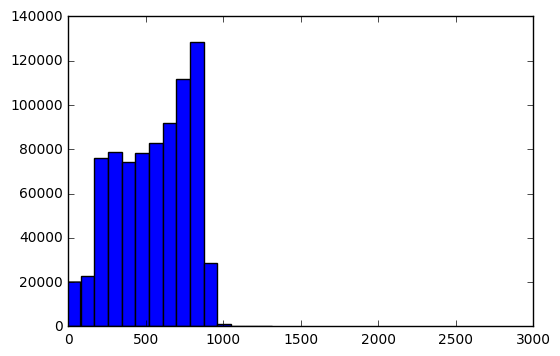

g_train_135.nii.npy


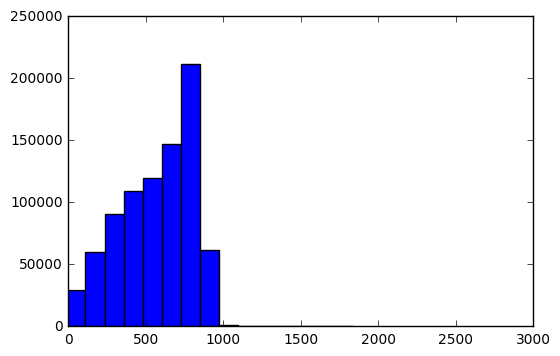

g_train_136.nii.npy


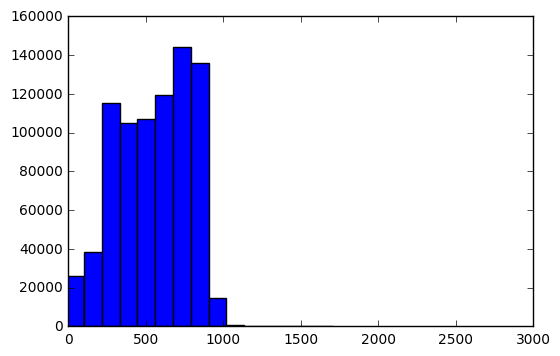

g_train_137.nii.npy


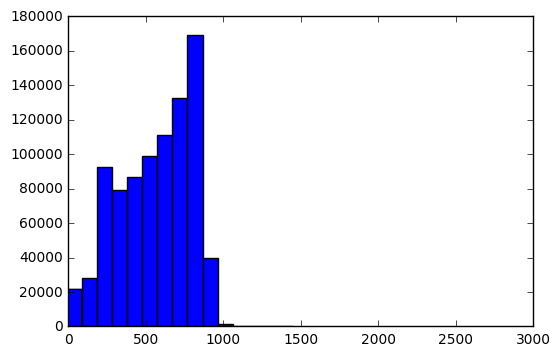

g_train_138.nii.npy


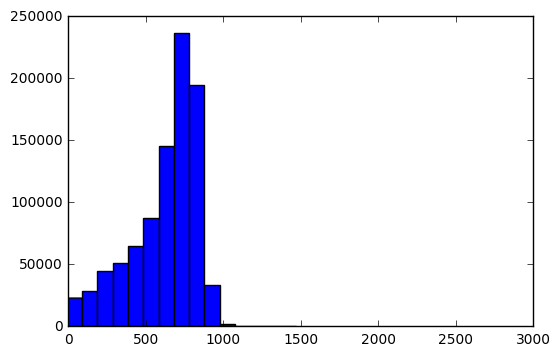

g_train_139.nii.npy


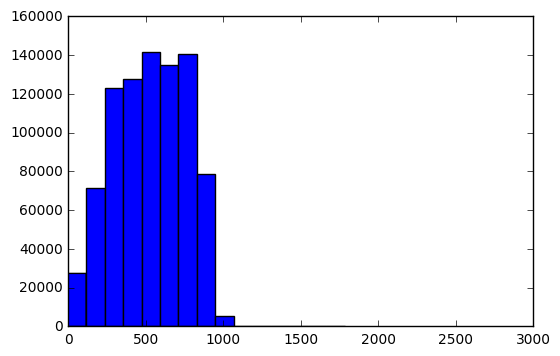

g_train_14.nii.npy


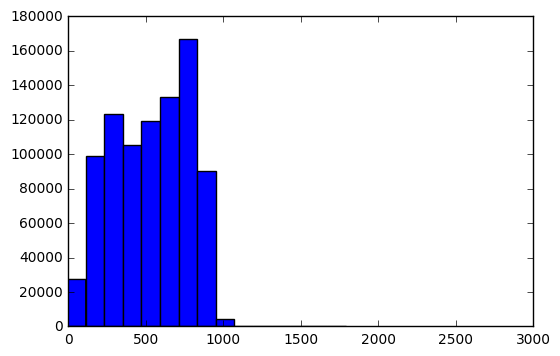

g_train_140.nii.npy


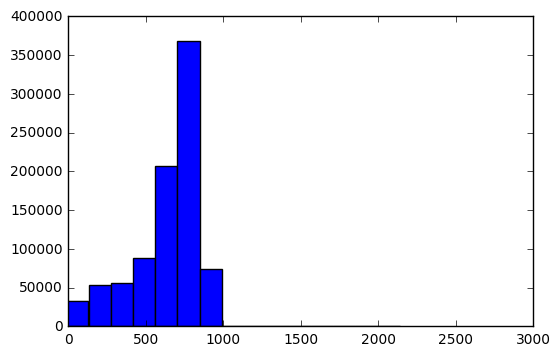

g_train_141.nii.npy


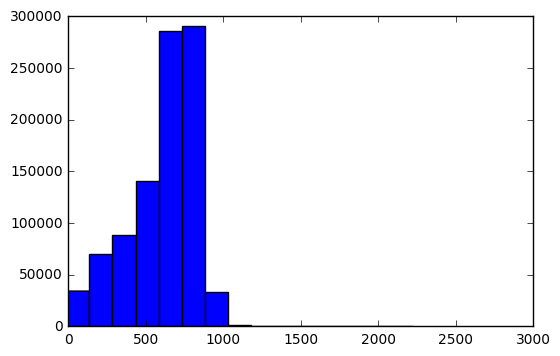

g_train_142.nii.npy


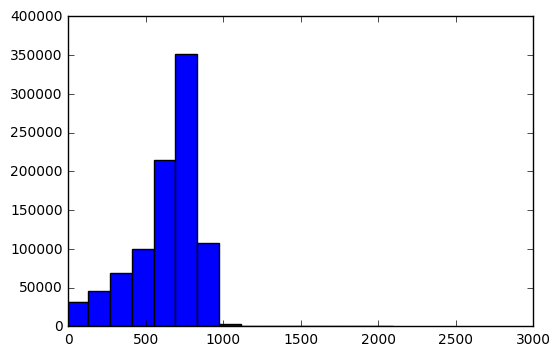

g_train_143.nii.npy


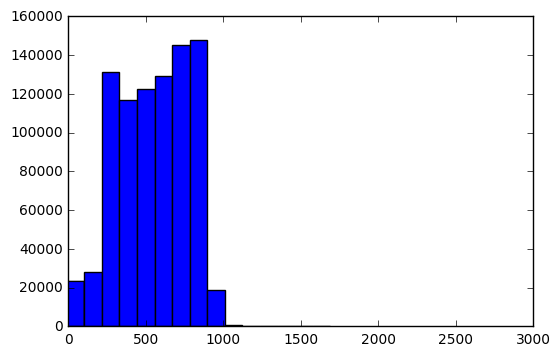

In [26]:
# visualize gray matter histograms
from __future__ import division
import os
import numpy as np
import gc
import nibabel as nib
import matplotlib.pyplot as plt
from os.path import isfile, join
mode = 'train'

test_path = '/home/igor/ML/data_2/set_'+mode+'_segmented/'

targets_file = join('/home/igor/ML/data_2/', 'targets.csv')

targets = [0]
with open(targets_file, 'rb') as csvfile:
    for line in csvfile:
        targets.append(int(line))

onlyfiles = [f for f in os.listdir(test_path) if isfile(join(test_path, f)) \
             and f.endswith('.nii.npy') and f.startswith('g_')]
onlyfiles.sort()
onlyfiles = onlyfiles[:50]
length = len(onlyfiles)

print 'Files found: in '+test_path+' ', length

plt.close()

count_h = targets.count(1)
count_i = targets.count(0)
print 'count_h: ', count_h
print 'count_i: ', count_i
xmin = 0
xmax = 3000

for i,f in enumerate(onlyfiles):
    plt.close()
    print f
    full_f = join(test_path, f)
    ndImg = np.load(full_f)
    pic_id = int(f.split('_')[2].split('.')[0])
    
    # here plot the histogram for this image
    new_size = ndImg.shape[0] * ndImg.shape[1] * ndImg.shape[2]
    imgLst = np.reshape(ndImg, (1, new_size))
    imgLst = imgLst[imgLst <> 0]
    

    plt.hist(imgLst, bins = 15, alpha=1)
    plt.xlim([xmin, xmax])                         
    plt.show()
    gc.collect()
    

#print 'Healthy std:  ', int(np.sqrt(np.sum(h_std)))
#print 'Ill std:      ', int(np.sqrt(np.sum(i_std)))

In [13]:
arr = [[0,1,22], [0,4,0], [55,0,6]]
arr = np.reshape(arr, (1, 9))
arr = arr[arr <> 0]
print arr


[ 1 22  4 55  6]
